## ROC Curve Explainer
https://youtu.be/OAl6eAyP-yo

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Get the file path on your local machine
path = '../pandas-grouping-lesson/datasets/titanic_clean.csv'

In [5]:

titanic = pd.read_csv(path)

# Encode female as 0 and male as 1.
titanic['Sex'] = titanic.Sex.map({'female':0, 'male':1})

# Fill in the missing values for age with the median age.
titanic.Age.fillna(titanic.Age.median(), inplace=True)

# Create a DataFrame of dummy variables for Embarked.
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked')
embarked_dummies.drop(embarked_dummies.columns[0], axis=1, inplace=True)

# Concatenate the original DataFrame and the dummy DataFrame.
titanic = pd.concat([titanic, embarked_dummies], axis=1)

feature_cols = ['Pclass', 'Sex', 'Age', 'Embarked_Q', 'Embarked_S']

X = titanic[feature_cols]
y = titanic.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

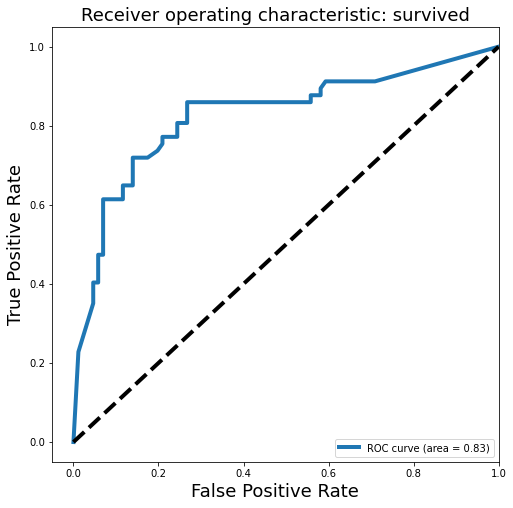

In [6]:
# we use area under the curve (auc) to understand how well our classifier separates classes at all possible thresholds
# in the end we have to choose a threshold, roc curve helps us visualize the impact of that choice 

# get predicted probabalities
rfc_pred_prob = rfc.predict_proba(X_test)[:,1]

# get false positive and true positve rates at various thresholds from receiver operating characteristic 
# curve function
fpr, tpr, _ = roc_curve(y_test, rfc_pred_prob)

# pass false positive and true positve rates into area under the curve function to get score
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic: survived', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### In groups, add a tab for evaluation metrics to to machine learning framework and describe AUC